In [6]:
import seaborn as sns
df=sns.load_dataset("tips")
df.head

<bound method NDFrame.head of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

#**2.Understanding the dataset 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#**stats summ

In [8]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#**4relationship check before using any model we must confirm relationship 

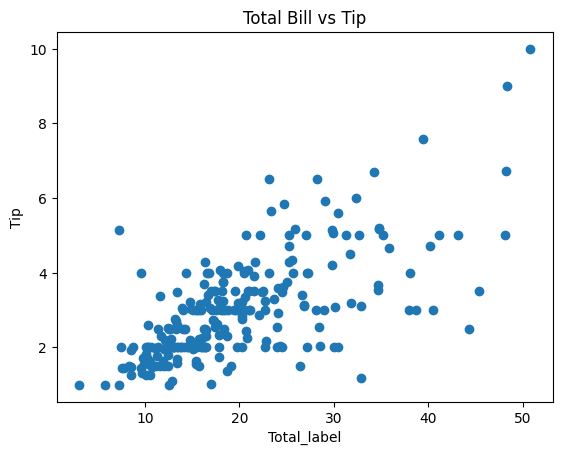

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df["total_bill"], df["tip"])
plt.xlabel("Total_label")
plt.ylabel("Tip")
plt.title("Total Bill vs Tip")
plt.show()

1.as the bill increases tip increases
2.relationship=straight line(we can use linear regression )

4.feature and target seperation 

In [11]:
x=df[["total_bill"]]  # for dataframe [[]]
y=df["tip"] # o/p in series so 1d 


5.Train-Test Split a model must perform well on unseen data
test_size = 0.2 means 20 percent of data is for testing remaining for training 
random_state decide for training data out of 80 percent 42 records are chosen for training  

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


#


6.feature standardization
1.compare the coefficients fairly
2.avoid the dominance for large values 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


1.fit only on training data 
2.prevents data leakage 
fit_transform performed on training data as standarization takes place 
transform on testing data  allows no data leakage as no standarization 




7.train linear regression model 


In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_trained_scaled, y_train)

print("co-efficient (m):", model.coef_[0])
print("intercept (c):", model.intercept_)

y_pred = model.predict(x_test_scaled)


co-efficient (m): 0.9357171400271826
intercept (c): 3.0877948717948724


8.model evaluation 

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("R2 SCORE:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R2 SCORE: 0.5449381659234664
MSE: 0.5688142529229538
RMSE: 0.7541977545199626


9.visualize the best fit line 

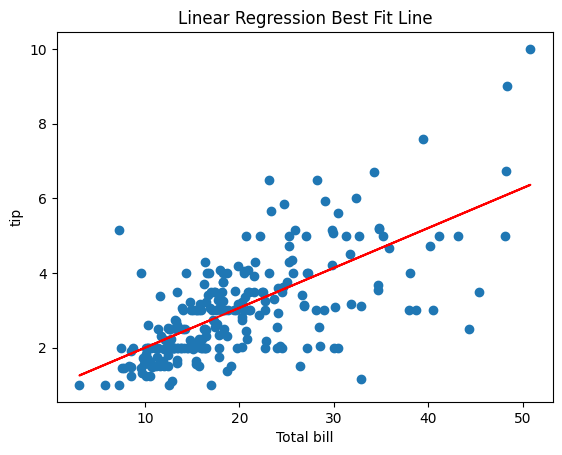

In [33]:
plt.scatter(x, y)
plt.plot(x, model.predict(scaler.transform(x)), color="red")
plt.xlabel("Total bill")
plt.ylabel("tip")
plt.title("Linear Regression Best Fit Line")
plt.show()


In [ ]:
10.input-output real time 

In [ ]:
bill_amount = float(input("Enter the bill amount: "))

bill_scaled = scaler.transform([[bill_amount]])
predict_tip = model.predict(bill_scaled)

print(f"Predicted tip: {predict_tip[0]:.2f}")
